In [4]:
import xarray as xr
import numpy as np
import dask
from tqdm import tqdm
import pandas as pd
import xwmb
import xwmt
import xgcm
import warnings
warnings.filterwarnings('ignore')
import math

import numpy as np
import regionate
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cftime
from datetime import datetime

In [11]:
import ipywidgets as widgets
from IPython.display import display

In [5]:
xwmb.__version__, xwmt.__version__, xgcm.__version__

('0.1.0', '0.1.1', '0.8.2.dev15+g7492277')

In [6]:
hfdrake_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/data_daily/"
ds = xr.open_mfdataset(f"{hfdrake_path}/*.ocean_daily.*.nc", chunks={"time":1})
snap = xr.open_mfdataset(f"{hfdrake_path}/*.ocean_daily_snap*.nc", chunks={"time":1})
static = xr.open_dataset("/pub/hfdrake/datasets/CM4_MHW_blobs/data/WMT_monthly/ocean_month_rho2.static.nc")#chunks={'time':1})

In [7]:
mt_path = "/pub/mariant3/WarmWaterMasses/notebooks/02_mhw_metrics/data_ocetrac-labels/"
blobs = xr.open_dataset(f"{mt_path}/01860503-01901020_ocetrac-labels-region.nc")
labels = blobs.blobs
df = pd.read_pickle(f"{mt_path}/01860503-01901020_mhw-metrics-region.pkl")

In [8]:
ids = np.unique(labels)
ids = np.array([id for id in ids if ~np.isnan(id)])
ids

array([  3.,   6.,  22.,  25.,  26.,  32.,  34.,  35.,  36.,  37.,  40.,
        41.,  42.,  45.,  48.,  49.,  50.,  51.,  55.,  56.,  58.,  69.,
        71.,  74.,  75.,  78.,  79.,  80.,  84.,  86.,  87.,  88.,  89.,
        90.,  91.,  94.,  98.,  99., 101., 103., 112., 113., 116., 118.,
       119., 120., 122., 127., 128., 130., 132., 133., 143., 145., 146.,
       148., 153., 156., 158., 159., 171., 184., 186., 189., 190., 194.,
       201., 202., 208., 212., 220., 221., 223., 224., 226., 227., 228.,
       231., 237., 242., 244., 246., 247., 249., 252., 256.])

In [9]:
#ids186 are the unique events in one year
ids186 = np.unique(labels.sel(time=slice('0190','0190')))
ids186 = np.array([id for id in ids186 if ~np.isnan(id)])
print(ids186)
len(ids186)

[201. 202. 208. 212. 220. 221. 223. 224. 226. 227. 228. 231. 237. 242.
 244. 246. 247. 249. 252. 256.]


20

In [13]:
import numpy as np
import pandas as pd

# Assuming `labels` is your dataset with a 'time' coordinate
# For demonstration, replace 'labels' with the actual dataset variable name

# Define the years range
years = ['0186', '0187', '0188', '0189', '0190']

# Initialize an empty dictionary to store the counts
yearly_counts = {}

# Loop through each year and count unique events
for year in years:
    ids = np.unique(labels.sel(time=slice(year, year)))
    ids = np.array([id for id in ids if ~np.isnan(id)])
    yearly_counts[year] = len(ids)

# Convert the dictionary to a DataFrame
dfmhws = pd.DataFrame(yearly_counts, index=['Number of Unique Events'])
dfmhws.columns.name = 'Year'

# Print the DataFrame
display(dfmhws)

# Optionally, save the DataFrame to a CSV file
#df.to_csv('/mnt/data/yearly_unique_events.csv')

Year,0186,0187,0188,0189,0190
Number of Unique Events,20,15,17,14,20


In [15]:
df_latex = dfmhws.to_latex(index=True, header=True)
print(df_latex)

\begin{tabular}{lrrrrr}
\toprule
Year & 0186 & 0187 & 0188 & 0189 & 0190 \\
\midrule
Number of Unique Events & 20 & 15 & 17 & 14 & 20 \\
\bottomrule
\end{tabular}



In [16]:
event_label = 25
len(df.loc[df.id==event_label].date.values[-1])


29

In [17]:
event_label = 25
df.loc[df.id==event_label].area.values[-1].min()


287833980000.0

In [18]:
event = (labels==25).any("time")
event

<xarray.DataArray 'blobs' (yh: 193, xh: 547)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * xh       (xh) float64 -137.9 -137.7 -137.4 ... -0.7242 -0.4758 -0.2274
  * yh       (yh) float64 8.222 8.469 8.716 8.963 ... 48.43 48.59 48.76 48.92

In [19]:
ds = xr.merge([ds, event], join="inner")
ds

<xarray.Dataset>
Dimensions:                         (time: 1460, xh: 269, yh: 130, zl: 75,
                                     xq: 270, yq: 131)
Coordinates:
  * time                            (time) object 0186-01-01 12:00:00 ... 018...
  * xh                              (xh) float64 -137.9 -137.7 ... -70.16 -69.91
  * yh                              (yh) float64 10.2 10.44 ... 38.87 39.07
  * zl                              (zl) float64 1.0 3.0 ... 3.591e+03 5.111e+03
  * xq                              (xq) float64 -137.8 -137.6 ... -69.76 -69.51
  * yq                              (yq) float64 10.32 10.56 ... 39.16 39.36
Data variables: (12/23)
    S_advection_xy                  (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    T_advection_xy                  (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    T_adx                           (time, zl, yh, xq) float32 dask.array<chunksize=(1, 75, 130, 270), meta=np.ndarray>
    T_ady                           (time, zl, yq, xh) float32 dask.array<chunksize=(1, 75, 131, 269), meta=np.ndarray>
    Th_tendency_vert_remap          (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    boundary_forcing_h_tendency     (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    ...                              ...
    umo                             (time, zl, yh, xq) float32 dask.array<chunksize=(1, 75, 130, 270), meta=np.ndarray>
    vert_remap_h_tendency           (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    vmo                             (time, zl, yq, xh) float32 dask.array<chunksize=(1, 75, 131, 269), meta=np.ndarray>
    volcello                        (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    wfo                             (time, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
    blobs                           (yh, xh) bool False False ... False False
Attributes:
    filename:          01860101.ocean_daily.nc
    title:             CM4_piControl_C_restartyear186
    associated_files:  areacello: 01860101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           Wed Mar 20 15:17:19 2024: ncks -v S_advection_xy -d xh...
    NCO:               netCDF Operators version 5.0.1 (Homepage = http://nco....

In [20]:
# Merge snapshots with time-averages
snap = snap.rename({
    **{'time':'time_bounds'},
    **{v:f"{v}_bounds" for v in snap.data_vars}
})
ds = xr.merge([ds.sel(time=ds.time[1:]), snap])
ds

<xarray.Dataset>
Dimensions:                         (time: 1459, xh: 269, yh: 130, zl: 75,
                                     xq: 270, yq: 131, time_bounds: 1460)
Coordinates:
  * time                            (time) object 0186-01-02 12:00:00 ... 018...
  * xh                              (xh) float64 -137.9 -137.7 ... -70.16 -69.91
  * yh                              (yh) float64 10.2 10.44 ... 38.87 39.07
  * zl                              (zl) float64 1.0 3.0 ... 3.591e+03 5.111e+03
  * xq                              (xq) float64 -137.8 -137.6 ... -69.76 -69.51
  * yq                              (yq) float64 10.32 10.56 ... 39.16 39.36
  * time_bounds                     (time_bounds) object 0186-01-02 00:00:00 ...
Data variables: (12/28)
    S_advection_xy                  (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    T_advection_xy                  (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    T_adx                           (time, zl, yh, xq) float32 dask.array<chunksize=(1, 75, 130, 270), meta=np.ndarray>
    T_ady                           (time, zl, yq, xh) float32 dask.array<chunksize=(1, 75, 131, 269), meta=np.ndarray>
    Th_tendency_vert_remap          (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    boundary_forcing_h_tendency     (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    ...                              ...
    blobs                           (yh, xh) bool False False ... False False
    rhopot2_bounds                  (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    thetao_bounds                   (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    thkcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    volcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    zos_bounds                      (time_bounds, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
Attributes:
    filename:          01860101.ocean_daily.nc
    title:             CM4_piControl_C_restartyear186
    associated_files:  areacello: 01860101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           Wed Mar 20 15:17:19 2024: ncks -v S_advection_xy -d xh...
    NCO:               netCDF Operators version 5.0.1 (Homepage = http://nco....

In [21]:
ds = xr.merge([static,ds],join='inner')

In [22]:
def add_estimated_layer_interfaces(ds):
    return ds.assign_coords({"zi": xr.DataArray(
        np.concatenate([[0], 0.5*(ds.zl.values[1:]+ds.zl.values[0:-1]), [6000]]),
        dims=('zi',)
    )})

In [23]:
ds = add_estimated_layer_interfaces(ds)

In [24]:
# Add core coordinates of static to ds
ds = ds.assign_coords({
    "areacello": xr.DataArray(ds["areacello"].values, dims=('yh', 'xh',)), # Required for area-integration
    "lon": xr.DataArray(ds["geolon"].values, dims=('yh', 'xh',)), # Required for calculating density if not already provided!
    "lat": xr.DataArray(ds["geolat"].values, dims=('yh', 'xh',)), # Required for calculating density if not already provided!
    "xq": xr.DataArray(ds["xq"].values, dims=('xq',)),
    "yq": xr.DataArray(ds["yq"].values, dims=('yq',)),
    "deptho": xr.DataArray(ds["deptho"].values, dims=('yh', 'xh',)),
    "geolon": xr.DataArray(ds["geolon"].values, dims=('yh', 'xh',)),
    "geolat": xr.DataArray(ds["geolat"].values, dims=('yh', 'xh',)),
    "geolon_c": xr.DataArray(ds["geolon_c"].values, dims=('yq', 'xq',)),
    "geolat_c": xr.DataArray(ds["geolat_c"].values, dims=('yq', 'xq',)),
})

# xgcm grid for dataset
coords = {
    'X': {'center': 'xh', 'outer': 'xq'},
    'Y': {'center': 'yh', 'outer': 'yq'},
    'Z': {'center': 'zl', 'outer': 'zi'}
}
#'Z': {'center': 'rho2_l', 'outer': 'rho2_i'}
#'Z': {'center': 'zl', 'outer': 'zl'}
metrics = {
    ('X','Y'): "areacello", # Required for area-integration
}

ds['tos'] = ds['thetao'].isel(zl=0)
#ds['sos'] = ds['so'].isel(zl=0)

grid = xgcm.Grid(ds.copy(), coords=coords, metrics=metrics, boundary={'X':'extend', 'Y':'extend', 'Z':'extend'}, autoparse_metadata=False)

In [25]:
wm = xwmt.WaterMass(grid)

In [26]:
import xbudget
budgets_dict = xbudget.load_preset_budget(model="MOM6_3Donly").copy()
del budgets_dict['salt']['lhs']
del budgets_dict['salt']['rhs']

In [27]:
xbudget.collect_budgets(grid, budgets_dict)

In [ ]:
budgets_dict

(10.0, 38.0)

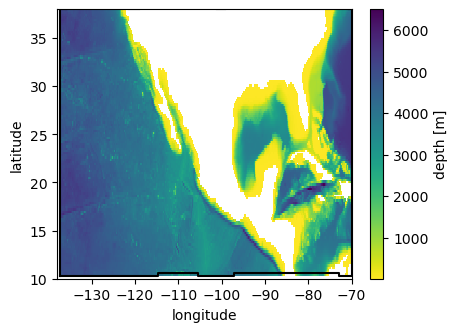

In [28]:
import numpy as np
import regionate
import matplotlib.pyplot as plt

# Note: the properties of this region are quite different from the rest of the Baltic!
name = "MANSO"
#lons = np.array([8.,   20.,  29., 24.5, 24.5, 26.1, 17.5, 11.5])
#lons = np.arange([-138, 0, 3.4])
lons = np.array([-138.,-120.,-100., -70., -70., -100., -120., -138.])
#lats = np.arange(8, 49, 1)
lats = np.array([10., 10., 10., 10., 38., 38., 38., 38.])
#lats = np.array([53.5, 53.5, 54.5,  59.,  61.,  63., 64.5,  62.])
manso_region = regionate.GriddedRegion(name, lons, lats, grid)

plt.figure(figsize=(4.75,3.5))
pc = plt.pcolor(
    grid._ds['geolon_c'],
    grid._ds['geolat_c'],
    grid._ds['deptho'],
    cmap="viridis_r"
)
plt.colorbar(pc, label="depth [m]")
plt.plot(regionate.loop(manso_region.lons), regionate.loop(manso_region.lats), color="k");
plt.xlabel("longitude");
plt.ylabel("latitude");
plt.xlim(np.min(lons), np.max(lons))
plt.ylim(np.min(lats), np.max(lats))

#plt.xlim(-200,5)
#plt.ylim(-10,80)

In [29]:
import warnings

lam = "heat"
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    wmb = xwmb.WaterMassBudget(
        grid,
        budgets_dict,
        manso_region.mask
    )
    wmb.mass_budget(lam, greater_than=True, default_bins=True)
    #wmt = wmb.wmt


In [30]:
wmb.rho_ref

1035.0

### <span style="color:#d93f21">Water Mass Transformation Analysis for GRC poster begins</span>

In [31]:
wmt = xr.open_dataset('/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/0186-wmt-daily.nc')
wmt25 = xr.open_dataset('/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/wmt_mhw_25-full.nc')

In [32]:
ds186 = ds.sel(time=slice('0186','0186'))

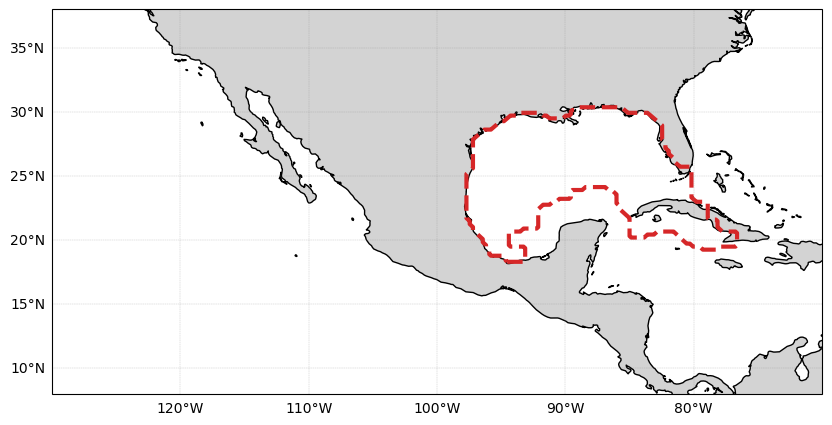

In [95]:
plt.figure(figsize=(10, 5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_xlim([-130, -70])
ax.set_ylim([8, 38])

event = (labels==event_label).any("time")
event.plot.contour(levels=[0.5], colors='C3', linewidths=3, linestyles='--') ##3f309c

gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set fontsize for x and y axis labels
#gl.xlabel_style = {'size': 28}
#gl.ylabel_style = {'size': 28}
plt.savefig('/pub/mariant3/WarmWaterMasses/figures/total-mhw25-extent-paper.png', bbox_inches='tight')

plt.show()

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import cftime


def plot_wmt(wmt, thetao, time_slice=None, label='manso', figsize=(10, 3), vmin=None, vmax=None, xlim=None, ylim=None):
    """
    Plotting calculated wmt for a given region

    Parameters:
    - wmt
    - thetao: target temperature
    - time_slice: Optional. Write as ('start_date', 'end_date').
      If None, the entire time range will be plotted.
    - label (str): Optional. The label for the plot.
    - figsize (tuple): Optional. Size of the figure (width, height).
    - vmin (float): Optional. Minimum value for color scale.
    - vmax (float): Optional. Maximum value for color scale.

    Returns:
    None
    """
    wmt_sel = wmt.sel(thetao_l_target=thetao, method='nearest')
    
    if time_slice:
        wmt_sel = wmt_sel.sel(time=slice(time_slice[0], time_slice[1]))

    plt.figure(figsize=figsize)  
    
    (-wmt_sel.boundary_fluxes).plot(label='boundary fluxes')
    wmt_sel.mass_tendency.plot(label=r"$\partial_{t} \mathcal{M}$")
    (-wmt_sel.diffusion).plot(label=r"diffusion")
    wmt_sel.mass_source.plot(label=r"mass_source")
    wmt_sel.convergent_mass_transport.plot(label='advection')
    (-wmt_sel.spurious_numerical_mixing).plot(label='spurious mixing')

    plt.legend()
    plt.title(label)
    plt.grid(True, linewidth=0.2)
    
    if vmin is not None and vmax is not None:
        plt.ylim(vmin, vmax)
        
    plt.show()


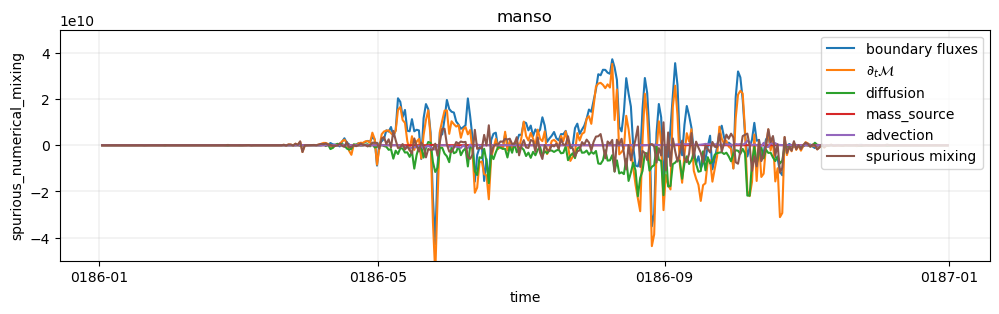

In [35]:
plot_wmt(wmt, thetao=29, label='manso',time_slice=('0186','0186'),figsize=(12, 3),vmin=-5e+10, vmax=5e+10)
#plot_wmt_max(wmt_mhw, thetao=29, label='mhw25',time_slice=(f'{date_start}',f'{date_end}'),figsize=(12, 3),vmin=-5e+10, vmax=5e+10)

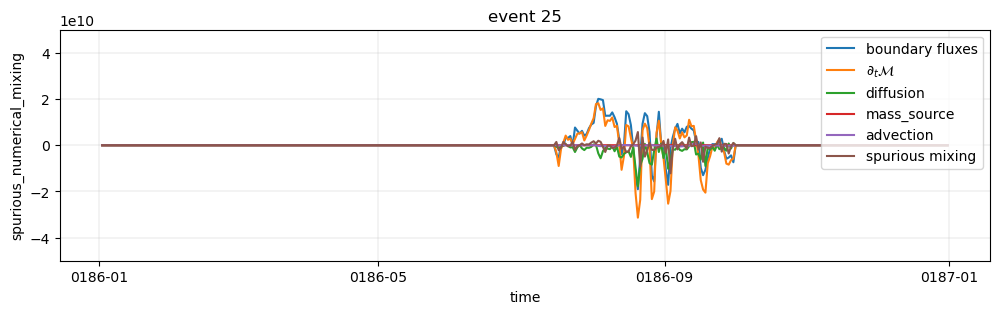

In [36]:
plot_wmt(wmt25, thetao=29, label='event 25',time_slice=('0186','0186'),figsize=(12, 3),vmin=-5e+10, vmax=5e+10)

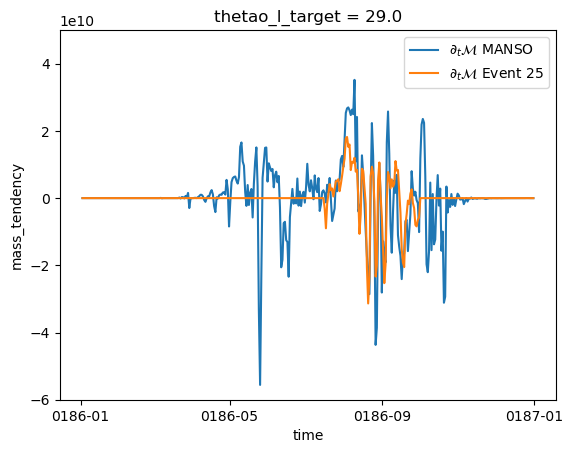

In [37]:
wmt.mass_tendency.sel(time=slice('0186','0186')).sel(thetao_l_target=29,method="nearest").plot(label=r"$\partial_{t} \mathcal{M}$ MANSO")
wmt25.mass_tendency.sel(time=slice('0186','0186')).sel(thetao_l_target=29,method="nearest").plot(label=r"$\partial_{t} \mathcal{M}$ Event 25")

plt.ylim(-6e+10, 5e+10)
plt.legend()
plt.show()

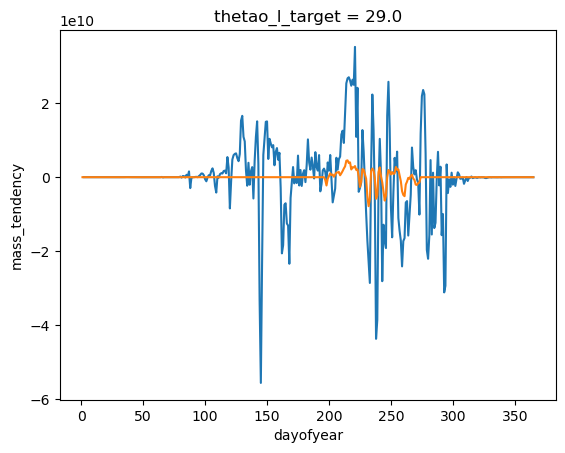

In [38]:
wmt.mass_tendency.sel(thetao_l_target=29, method="nearest").groupby("time.dayofyear").mean("time").plot()
wmt25.mass_tendency.sel(thetao_l_target=29, method="nearest").groupby("time.dayofyear").mean("time").plot()

In [39]:
ΔMManso = (wmt['mass_tendency']*wmt.dt).cumsum('time').interp(thetao_l_target=29)
ΔMMHW = (wmt25['mass_tendency']*wmt.dt).cumsum('time').interp(thetao_l_target=29)

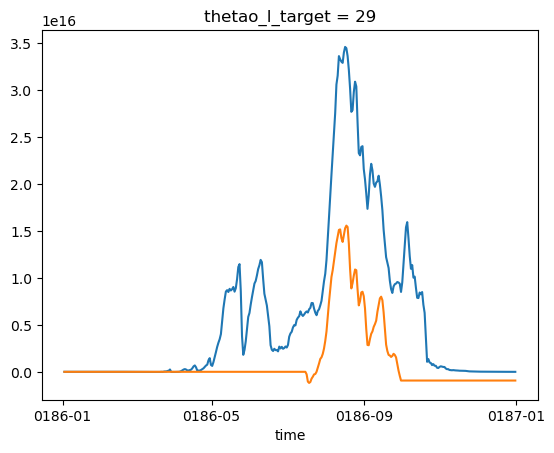

In [40]:
ΔMManso.plot()
ΔMMHW.plot()

#### Define a ds with interest dates

In [ ]:
dateened= '0186-12-01'


In [42]:
dsmhw = ds.sel(time=slice(datestart,dateened))

In [43]:
wmt_mhw_manso = wmt.sel(time=slice(datestart,dateened))
wmt_mhw_25 = wmt25.sel(time=slice(datestart,dateened))

In [44]:
ΔMManso_mhw = (wmt_mhw_manso['mass_tendency']*wmt_mhw_manso.dt).cumsum('time').interp(thetao_l_target=29)
ΔMMHW_mhw = (wmt_mhw_25['mass_tendency']*wmt_mhw_25.dt).cumsum('time').interp(thetao_l_target=29)

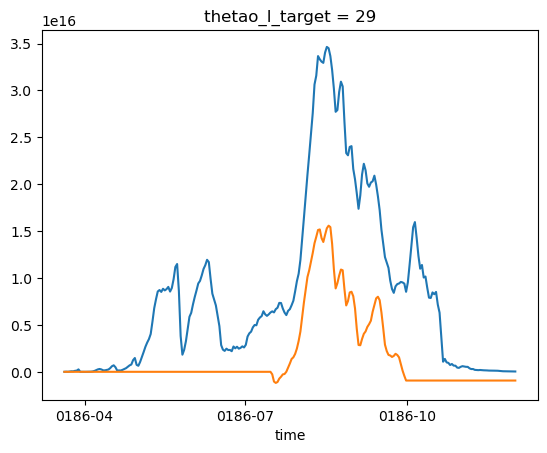

In [45]:
ΔMManso_mhw.plot()
ΔMMHW_mhw.plot()

In [46]:
idx_max = ΔMMHW_mhw.argmax()
print(idx_max)
idx_form = np.arange(0, idx_max+1)
#print(idx_form)
idx_destroy = np.arange(idx_max, dsmhw.time.size + 2)
#print(idx_destroy)

<xarray.DataArray ()>
array(150)
Coordinates:
    thetao_l_target  int64 29


In [47]:
idx_max_manso = ΔMManso_mhw.argmax()
idx_form_manso = np.arange(0, idx_max_manso+1)
idx_destroy_manso = np.arange(idx_max_manso, dsmhw.time.size + 2)

In [48]:
idx_max_manso

<xarray.DataArray ()>
array(149)
Coordinates:
    thetao_l_target  int64 29

In [49]:
idx_destroy_manso

array([149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 255, 256, 257, 258])

In [50]:
idx_destroy[-1]

258

In [51]:
wmt_plot = wmt_mhw_25.isel(time=slice(0,idx_destroy[-1]))

In [52]:
manso_wmt_plot = wmt_mhw_manso.isel(time=slice(0,idx_destroy[-1]))

In [44]:
#M_total = (wmb.rho_ref * ds186['thkcello'] * ds186['areacello']).where(event).sum(['zl', 'yh', 'xh']).mean('time').values 

In [45]:
# from matplotlib.ticker import FuncFormatter

# def M_to_percentage(x):
#     return x/M_total

# def percentage_to_M(x):
#     return x*M_total

In [275]:
idx_max

<xarray.DataArray ()>
array(150)
Coordinates:
    thetao_l_target  int64 29

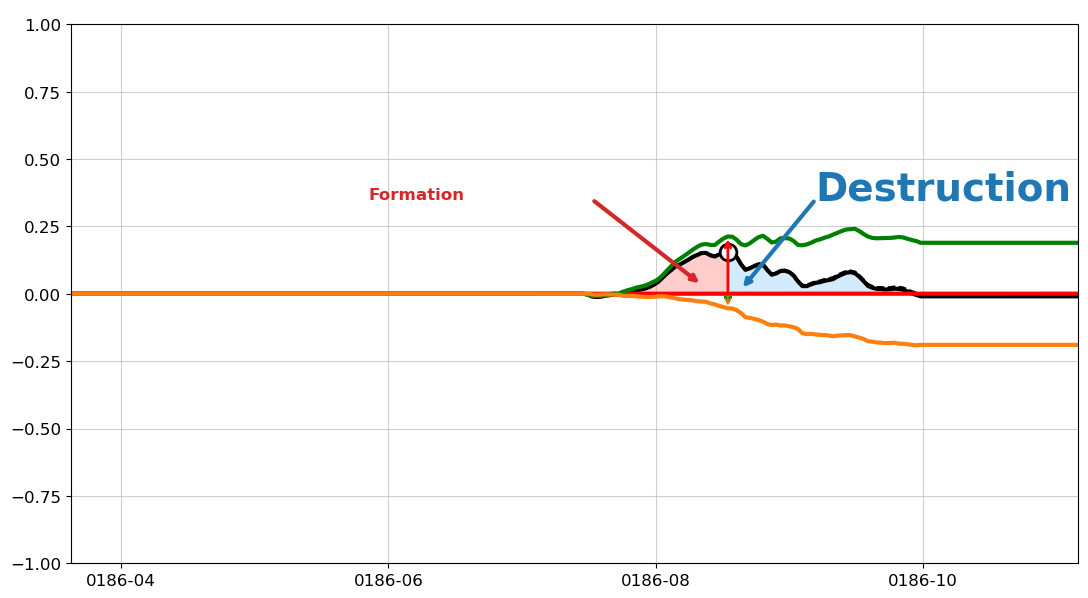

In [54]:
fig, ax = plt.subplots(figsize=(13, 7))

fontsize = 12
ΔMMHW_mhw.isel(time=slice(0, idx_destroy[-1])).plot(color="k",linewidth=3,label=r"$ \mathcal{M}(\Theta)$")
all_terms = (-(wmt_plot['boundary_fluxes'] + wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
all_terms.plot(color="k", label=r"$\langle \mathcal{G}^{surf}+\mathcal{G}^{mix} \rangle$", ls="--", alpha=1)


mass_source_mhw= (wmt_plot['mass_source'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
mass_source_mhw.plot(color="r", label=r"$-\langle \mathcal{S} \rangle$",linewidth=3)

ΔGsurf = (-wmt_plot['boundary_fluxes'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
ΔGsurf.plot(label=r"$\langle \mathcal{G}^{surf} \rangle$",linewidth=3,color ='g')


ΔGmix = (-(wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
ΔGmix.plot(label=r"$\langle \mathcal{G}^{mix} \rangle$",color='C1',linewidth=3)


#ax.axhline(y=ΔMMHW_mhw[0], color='k', linestyle='--',alpha=0.2)

ax.plot(ΔMMHW_mhw.time.isel(time=idx_max), ΔMMHW_mhw.isel(time=idx_max), 'wo', markeredgecolor='k', markersize=12,markeredgewidth=2,label=r"$\max\{\mathcal{M}(\Theta)\}$")

start_point = (ΔMMHW_mhw.time.isel(time=idx_max).values,ΔMMHW_mhw[0] )#ΔMMHW_mhw.isel(time=22).values)
end_point = (ΔMMHW_mhw.time.isel(time=idx_max).values, (-wmt_plot['boundary_fluxes'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).isel(time=idx_max).values)
ax.annotate('', xy=end_point, xytext=start_point, arrowprops=dict(arrowstyle='->', color='red',linewidth=2))

##Arrows
start_point = (ΔMMHW_mhw.time.isel(time=idx_max.values).values,ΔMMHW_mhw[0])#ΔMMHW_mhw.isel(time=22).values)
end_point_des = (ΔMMHW_mhw.time.isel(time=idx_max.values).values, ΔGmix.isel(time=idx_max.values).values)
ax.annotate('', xy=end_point_des, xytext=start_point, arrowprops=dict(arrowstyle='->', color='g',linewidth=2))

fill_times_form = ΔMMHW_mhw.time.isel(time=slice(0, idx_max.values+1)).values
fill_deltaM_form = ΔMMHW_mhw.isel(time=slice(0, idx_max.values+1)).values
mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).isel(time=slice(0, idx_max.values+1)).values
ax.fill_between(fill_times_form, mass_source_limit, fill_deltaM_form, color='red', alpha=0.2)

#Destruction
fill_times_des = ΔMMHW_mhw.time.isel(time=slice(idx_max.values, idx_destroy[-1])).values
fill_deltaM_des = ΔMMHW_mhw.isel(time=slice(idx_max.values, idx_destroy[-1])).values
mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).isel(time=slice(idx_max.values, idx_destroy[-1])).values
ax.fill_between(fill_times_des, mass_source_limit, fill_deltaM_des, color='#209cfa', alpha=0.2)

# Formation bold words from MANSO func
xaxform = ΔMMHW_mhw.time.isel(time=idx_max - 82).values
xaxdes = ΔMMHW_mhw.time.isel(time=idx_max + 20).values
yax = 0.35e17
ax.annotate("Formation", (xaxform, yax), color="C3", weight="bold", fontsize=12)
arrow_form_start = (ΔMMHW_mhw.time.isel(time=idx_max - 31).values, 0.35e17)
arrow_form_end = (ΔMMHW_mhw.time.isel(time=idx_max - 6).values, ΔMMHW_mhw[idx_max-17])
ax.annotate('', xy=arrow_form_end, xytext=arrow_form_start, arrowprops=dict(arrowstyle='->', color='C3', linewidth=3))

ax.annotate("Destruction", (xaxdes, yax), color="C0", weight="bold", fontsize=28)
arrow_des_start = (ΔMMHW_mhw.time.isel(time=idx_max + 20).values, 0.35e17) #ΔMMHW_mhw[idx_max-3]
arrow_des_end = (ΔMMHW_mhw.time.isel(time=idx_max + 3).values, ΔMMHW_mhw[idx_max-20])
ax.annotate('', xy=arrow_des_end, xytext=arrow_des_start, arrowprops=dict(arrowstyle='->', color='C0', linewidth=3))
# Formation bold words from MANSO func end


# Formation bold words original
# xaxform = ΔMMHW_mhw.time.isel(time=idx_max - 70).values
# xaxdes = ΔMMHW_mhw.time.isel(time=idx_max + 20).values
# yax = ΔMMHW_mhw[idx_max -3]
# ax.annotate("Formation", (xaxform, yax), color="C3", weight="bold",fontsize=fontsize)
# arrow_form_start=(ΔMMHW_mhw.time.isel(time=idx_max - 25).values,ΔMMHW_mhw[idx_max-3])
# arrow_form_end=(ΔMMHW_mhw.time.isel(time=idx_max - 6).values,ΔMMHW_mhw[idx_max-15])
# ax.annotate('', xy=arrow_form_end, xytext=arrow_form_start, arrowprops=dict(arrowstyle='->', color='C3', linewidth=3))

# ax.annotate("Destruction", (xaxdes, yax), color="C0", weight="bold",fontsize=fontsize)#, arrowprops=dict(facecolor='k', shrink=0.05))
# arrow_des_start=(ΔMMHW_mhw.time.isel(time=idx_max + 20).values,ΔMMHW_mhw[idx_max-3])
# arrow_des_end=(ΔMMHW_mhw.time.isel(time=idx_max + 3).values,ΔMMHW_mhw[idx_max-15])
# ax.annotate('', xy=arrow_des_end, xytext=arrow_des_start, arrowprops=dict(arrowstyle='->', color='C0', linewidth=3))
# Formation bold words original end

ax.annotate('', xy=end_point_des, xytext=start_point, arrowprops=dict(arrowstyle='->', color='C1'))

ax.tick_params(axis='both', which='major', labelsize=12)

offset_text = ax.yaxis.get_offset_text()
offset_text.set_fontsize(10)
offset_text.set_color('w')
# Remove scientific notation
#ax.get_yaxis().get_major_formatter().set_scientific(False)

Tmax = '%.1f' % np.round(29, 1)
#plt.title(f"Cumulative mass budget for waters warmer than {Tmax}$\degree$C", fontsize=fontsize)
plt.title("")

#plt.ylabel(r"Cumulative WMT [10$^{17}$ kg]", fontsize=fontsize)

# legend = ax.legend(fontsize=30, labelspacing=0.05, handlelength=2, loc="center left", bbox_to_anchor=(1, 0.5), frameon=True)
# legend.get_frame().set_edgecolor('gray')
# legend.get_frame().set_linewidth(0.2)

#ax.set_xlabel("time", fontsize=20)
ax.set_xlabel("")
vmax=10e+16
vmin=-10e+16
plt.ylim(vmin, vmax)
plt.xlim(ΔMMHW_mhw.time.isel(time=0).values,ΔMMHW_mhw.time.isel(time=230).values)
plt.grid(True, alpha=0.6)
#plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/cumulative-mass-budget-MHW25.png', bbox_inches='tight')


In [71]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mass_budget(wmt_plot, fontsize, ΔMMHW_mhw, idx_destroy, idx_max):
    fig, ax = plt.subplots(figsize=(13, 7))

    ΔMMHW_mhw.isel(time=slice(0, idx_destroy[-1])).plot(color="k", linewidth=3, label=r"$ \mathcal{M}(\Theta)$")
    all_terms = (-(wmt_plot['boundary_fluxes'] + wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    all_terms.plot(color="k", label=r"$\langle \mathcal{G}^{surf}+\mathcal{G}^{mix} \rangle$", ls="--", alpha=0.5)

    mass_source_mhw = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    mass_source_mhw.plot(color="r", label=r"$-\langle \mathcal{S} \rangle$", linewidth=3)

    ΔGsurf = (-wmt_plot['boundary_fluxes'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    ΔGsurf.plot(label=r"$\langle \mathcal{G}^{surf} \rangle$", linewidth=3, color='g')

    ΔGmix = (-(wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    ΔGmix.plot(label=r"$\langle \mathcal{G}^{mix} \rangle$", color='C1', linewidth=3)

    ax.axhline(y=ΔMMHW_mhw[0], color='k', linestyle='--', alpha=0.2)
    ax.plot(ΔMMHW_mhw.time.isel(time=idx_max), ΔMMHW_mhw.isel(time=idx_max), 'wo', markeredgecolor='k', markersize=12, markeredgewidth=2, label=r"$\max\{\mathcal{M}(\Theta)\}$")

    start_point = (ΔMMHW_mhw.time.isel(time=idx_max).values, ΔMMHW_mhw[0])
    end_point = (ΔMMHW_mhw.time.isel(time=idx_max).values, ΔGsurf.isel(time=idx_max).values)
    ax.annotate('', xy=end_point, xytext=start_point, arrowprops=dict(arrowstyle='->', color='red', linewidth=2))

    start_point = (ΔMMHW_mhw.time.isel(time=idx_max.values).values, ΔMMHW_mhw[0])
    end_point_des = (ΔMMHW_mhw.time.isel(time=idx_max.values).values, ΔGmix.isel(time=idx_max.values).values)
    ax.annotate('', xy=end_point_des, xytext=start_point, arrowprops=dict(arrowstyle='->', color='C0', linewidth=2))

    fill_times_form = ΔMMHW_mhw.time.isel(time=slice(0, idx_max.values+1)).values
    fill_deltaM_form = ΔMMHW_mhw.isel(time=slice(0, idx_max.values+1)).values
    mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29).isel(time=slice(0, idx_max.values+1)).values
    ax.fill_between(fill_times_form, mass_source_limit, fill_deltaM_form, color='red', alpha=0.2)

    fill_times_des = ΔMMHW_mhw.time.isel(time=slice(idx_max.values, idx_destroy[-1])).values
    fill_deltaM_des = ΔMMHW_mhw.isel(time=slice(idx_max.values, idx_destroy[-1])).values
    mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29).isel(time=slice(idx_max.values, idx_destroy[-1])).values
    ax.fill_between(fill_times_des, mass_source_limit, fill_deltaM_des, color='#209cfa', alpha=0.2)

    xaxform = ΔMMHW_mhw.time.isel(time=idx_max - 53).values #82
    xaxdes = ΔMMHW_mhw.time.isel(time=idx_max + 20).values
    yax = 0.35e17 #ΔMMHW_mhw[idx_max - 3]
    ax.annotate("Formation", (xaxform, yax), color="C3", weight="bold", fontsize=fontsize)
    arrow_form_start = (ΔMMHW_mhw.time.isel(time=idx_max - 31).values, 0.35e17)#ΔMMHW_mhw[idx_max])
    arrow_form_end = (ΔMMHW_mhw.time.isel(time=idx_max - 6).values, ΔMMHW_mhw[idx_max-15])
    ax.annotate('', xy=arrow_form_end, xytext=arrow_form_start, arrowprops=dict(arrowstyle='->', color='C3', linewidth=3))

    ax.annotate("Destruction", (xaxdes, yax), color="C0", weight="bold", fontsize=fontsize)
    arrow_des_start = (ΔMMHW_mhw.time.isel(time=idx_max + 20).values,0.35e17)# ΔMMHW_mhw[idx_max-3])
    arrow_des_end = (ΔMMHW_mhw.time.isel(time=idx_max + 3).values, ΔMMHW_mhw[idx_max-15])
    ax.annotate('', xy=arrow_des_end, xytext=arrow_des_start, arrowprops=dict(arrowstyle='->', color='C0', linewidth=3))

    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    offset_text = ax.yaxis.get_offset_text()
    offset_text.set_fontsize(fontsize)
    offset_text.set_color('w')

    Tmax = '%.1f' % np.round(29, 1)
    #plt.title(f"Cumulative mass budget for waters warmer than {Tmax}$\degree$C", fontsize=fontsize)
    plt.title("")
    plt.ylabel(r"Cumulative WMT [10$^{17}$ kg]", fontsize=fontsize)

    # legend = ax.legend(fontsize=18, labelspacing=0.05, handlelength=2, loc="center left", bbox_to_anchor=(1, 0.5), frameon=True)
    # legend.get_frame().set_edgecolor('gray')
    # legend.get_frame().set_linewidth(0.2)

    ax.set_xlabel("")
    vmax=10e+16
    vmin=-10e+16
    plt.ylim(vmin, vmax)
    plt.xlim(ΔMMHW_mhw.time.isel(time=0).values,ΔMMHW_mhw.time.isel(time=230).values)
    plt.grid(True, alpha=0.6)
    #plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/cumulative-mass-budget-Manso.png', bbox_inches='tight')
    

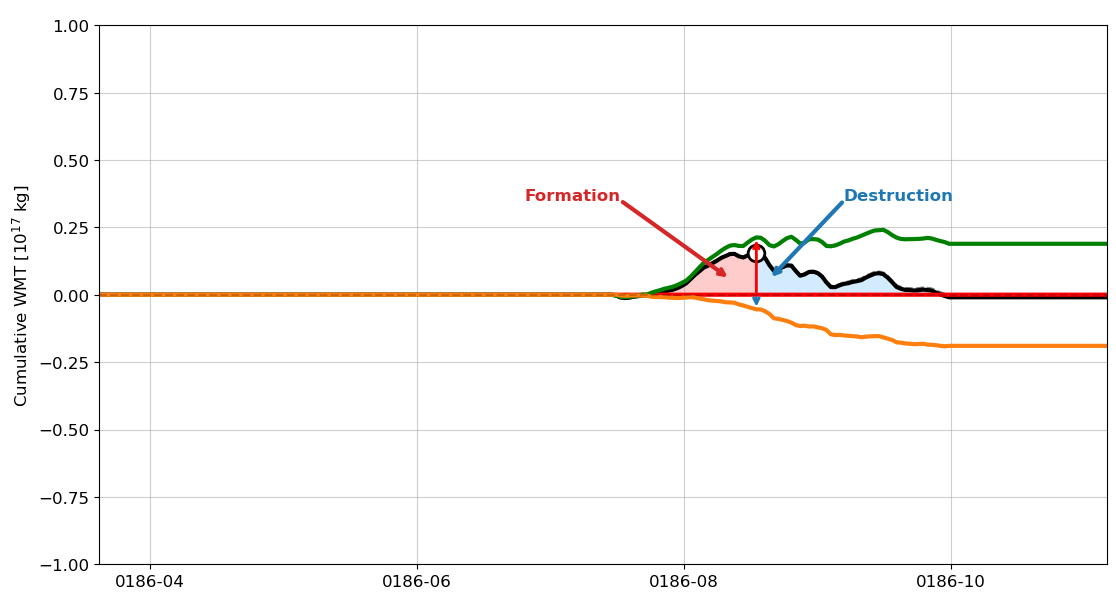

In [72]:
plot_mass_budget(wmt_mhw_25, fontsize=12, ΔMMHW_mhw=ΔMMHW_mhw, idx_destroy=idx_destroy_manso, idx_max=idx_max)

In [93]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mass_budget(wmt_plot, fontsize, ΔMMHW_mhw, idx_destroy, idx_max, linewidth=3):
    fig, ax = plt.subplots(figsize=(13, 7))

    ΔMMHW_mhw.isel(time=slice(0, idx_destroy[-1])).plot(color="k", linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")
    all_terms = (-(wmt_plot['boundary_fluxes'] + wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    all_terms.plot(color="k", label=r"$\langle \mathcal{G}^{surf}+\mathcal{G}^{mix} \rangle$", ls="--", alpha=0.5)

    mass_source_mhw = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    mass_source_mhw.plot(color="r", label=r"$-\langle \mathcal{S} \rangle$", linewidth=linewidth)

    ΔGsurf = (-wmt_plot['boundary_fluxes'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    ΔGsurf.plot(label=r"$\langle \mathcal{G}^{surf} \rangle$", linewidth=linewidth, color='g')

    ΔGmix = (-(wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    ΔGmix.plot(label=r"$\langle \mathcal{G}^{mix} \rangle$", color='#7932a8', linewidth=linewidth)

    ax.axhline(y=ΔMMHW_mhw[0], color='k', linestyle='--', alpha=0.2)
    ax.plot(ΔMMHW_mhw.time.isel(time=idx_max), ΔMMHW_mhw.isel(time=idx_max), 'wo', markeredgecolor='k', markersize=12, markeredgewidth=2, label=r"$\max\{\mathcal{M}(\Theta)\}$")

    start_point = (ΔMMHW_mhw.time.isel(time=idx_max).values, ΔMMHW_mhw[0])
    end_point = (ΔMMHW_mhw.time.isel(time=idx_max).values, ΔGsurf.isel(time=idx_max).values)
    ax.annotate('', xy=end_point, xytext=start_point, arrowprops=dict(arrowstyle='->', color='red', linewidth=linewidth))

    start_point = (ΔMMHW_mhw.time.isel(time=idx_max.values).values, ΔMMHW_mhw[0])
    end_point_des = (ΔMMHW_mhw.time.isel(time=idx_max.values).values, ΔGmix.isel(time=idx_max.values).values)
    ax.annotate('', xy=end_point_des, xytext=start_point, arrowprops=dict(arrowstyle='->', color='C0', linewidth=linewidth))

    fill_times_form = ΔMMHW_mhw.time.isel(time=slice(0, idx_max.values+1)).values
    fill_deltaM_form = ΔMMHW_mhw.isel(time=slice(0, idx_max.values+1)).values
    mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29).isel(time=slice(0, idx_max.values+1)).values
    ax.fill_between(fill_times_form, mass_source_limit, fill_deltaM_form, color='red', alpha=0.2)

    fill_times_des = ΔMMHW_mhw.time.isel(time=slice(idx_max.values, idx_destroy[-1])).values
    fill_deltaM_des = ΔMMHW_mhw.isel(time=slice(idx_max.values, idx_destroy[-1])).values
    mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29).isel(time=slice(idx_max.values, idx_destroy[-1])).values
    ax.fill_between(fill_times_des, mass_source_limit, fill_deltaM_des, color='#209cfa', alpha=0.2)

    xaxform = ΔMMHW_mhw.time.isel(time=idx_max - 53).values #82
    xaxdes = ΔMMHW_mhw.time.isel(time=idx_max + 20).values
    yax = 0.35e17 #ΔMMHW_mhw[idx_max - 3]
    ax.annotate("Formation", (xaxform, yax), color="C3", weight="bold", fontsize=fontsize)
    arrow_form_start = (ΔMMHW_mhw.time.isel(time=idx_max - 31).values, 0.35e17)#ΔMMHW_mhw[idx_max])
    arrow_form_end = (ΔMMHW_mhw.time.isel(time=idx_max - 6).values, ΔMMHW_mhw[idx_max-15])
    ax.annotate('', xy=arrow_form_end, xytext=arrow_form_start, arrowprops=dict(arrowstyle='->', color='C3', linewidth=linewidth))

    ax.annotate("Destruction", (xaxdes, yax), color="C0", weight="bold", fontsize=fontsize)
    arrow_des_start = (ΔMMHW_mhw.time.isel(time=idx_max + 20).values,0.35e17)# ΔMMHW_mhw[idx_max-3])
    arrow_des_end = (ΔMMHW_mhw.time.isel(time=idx_max + 3).values, ΔMMHW_mhw[idx_max-15])
    ax.annotate('', xy=arrow_des_end, xytext=arrow_des_start, arrowprops=dict(arrowstyle='->', color='C0', linewidth=linewidth))

    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    offset_text = ax.yaxis.get_offset_text()
    offset_text.set_fontsize(fontsize)
    offset_text.set_color('w')

    Tmax = '%.1f' % np.round(29, 1)
    plt.title("")
    plt.ylabel(r"Cumulative WMT [10$^{17}$ kg]", fontsize=fontsize)

    ax.set_xlabel("")
    vmax=10e+16
    vmin=-10e+16
    plt.ylim(vmin, vmax)
    plt.xlim(ΔMMHW_mhw.time.isel(time=0).values,ΔMMHW_mhw.time.isel(time=230).values)
    plt.grid(True, alpha=0.6)

    legend = ax.legend(fontsize=fontsize, labelspacing=0.05, handlelength=2, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
    legend.get_frame().set_edgecolor('gray')
    legend.get_frame().set_linewidth(0.2)

    plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/cumulative-mass-budget-manso-paper.png', bbox_inches='tight')


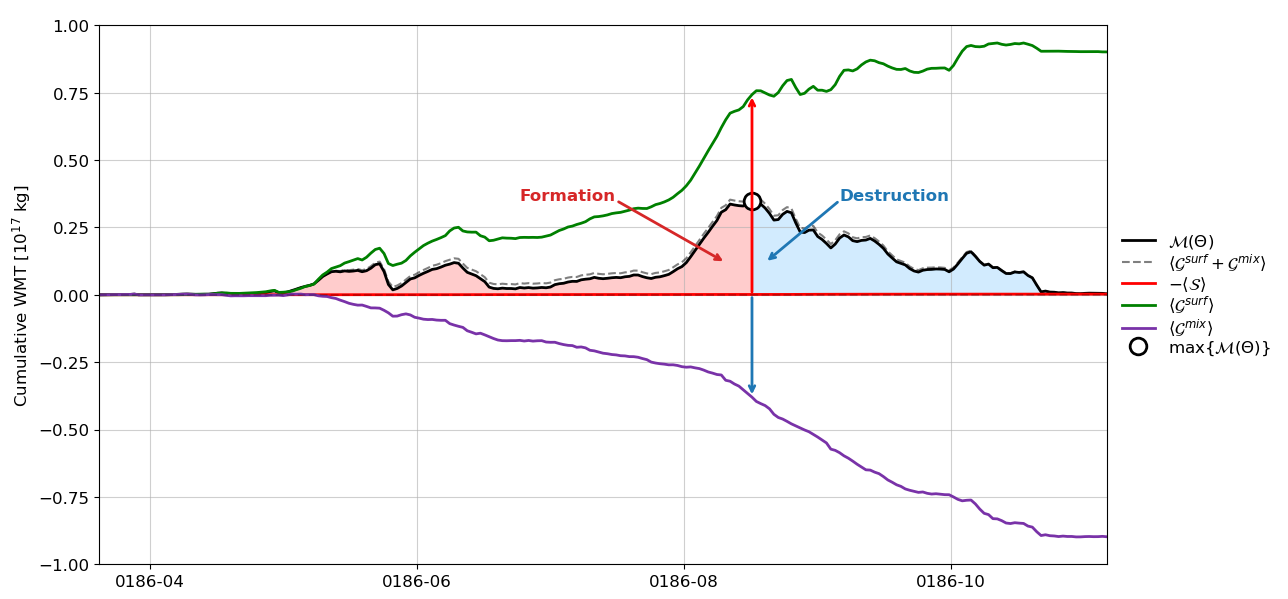

In [94]:
plot_mass_budget(wmt_mhw_manso, fontsize=12, ΔMMHW_mhw=ΔMManso_mhw, idx_destroy=idx_destroy_manso, idx_max=idx_max_manso, linewidth=2)

In [194]:
ΔMMHW_mhw[idx_max]

<xarray.DataArray ()>
array(1.55800816e+16)
Coordinates:
    time             object 0186-08-17 12:00:00
    thetao_l_target  int64 29

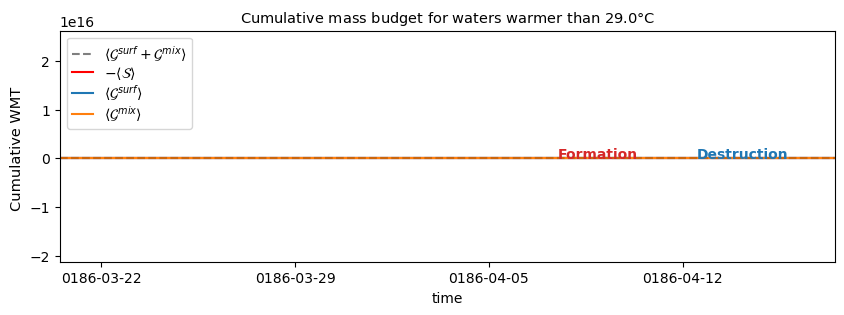

In [110]:
# Assume wmb, ds, event, wmt_plot, manso_wmt_plot, DeltaM, ΔMMHW_mhw, idx_destroy are defined

fig, ax = plt.subplots(figsize=(10, 3))

##Plotting the data
ΔMMHW_mhw.isel(time=slice(0, idx_destroy[-1])).plot(color="k")
#ΔMManso_mhw.isel(time=slice(0, idx_destroy[-1])).plot(color="k")
(-(wmt_plot['boundary_fluxes'] + wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).plot(color="k", label=r"$\langle \mathcal{G}^{surf}+\mathcal{G}^{mix} \rangle$", ls="--", alpha=0.5)
#(-(manso_wmt_plot['boundary_fluxes'] + manso_wmt_plot['diffusion'] + manso_wmt_plot['spurious_numerical_mixing']) * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).plot(color="k", label=r"$\langle \mathcal{G}^{surf}+\mathcal{G}^{mix} \rangle$ manso", ls="--", alpha=0.5)

(wmt_plot['mass_source'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).plot(color="r", label=r"$-\langle \mathcal{S} \rangle$")
#(manso_wmt_plot['mass_source'] * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).plot(color="r", label=r"$-\langle \mathcal{S} \rangle$ manso")

ΔGsurf = (-wmt_plot['boundary_fluxes'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
ΔGsurf.plot(label=r"$\langle \mathcal{G}^{surf} \rangle$")
#ΔGsurfManso = (-manso_wmt_plot['boundary_fluxes'] * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
#ΔGsurfManso.plot(label=r"$\langle \mathcal{G}^{surf} \rangle$ MANSO")
#(-manso_wmt_plot['boundary_fluxes'] * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).plot(label=r"$\langle \mathcal{G}^{surf} \rangle$ manso")

ΔGmix = (-(wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
ΔGmix.plot(label=r"$\langle \mathcal{G}^{mix} \rangle$")
#ΔGmixManso = (-(manso_wmt_plot['diffusion'] + manso_wmt_plot['spurious_numerical_mixing']) * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
#ΔGmixManso.plot(label=r"$\langle \mathcal{G}^{mix} \rangle$ MANSO")


##Line at 0
ax.axhline(y=ΔMMHW_mhw[0], color='k', linestyle='--',alpha=0.2)
##No fill marker
ax.plot(ΔMMHW_mhw.time.isel(time=idx_max), ΔMMHW_mhw.isel(time=idx_max), 'wo', markeredgecolor='k', markersize=8)

##Arrows
start_point = (ΔMMHW_mhw.time.isel(time=idx_max).values,ΔMMHW_mhw[0] )#ΔMMHW_mhw.isel(time=22).values)
end_point = (ΔMMHW_mhw.time.isel(time=idx_max).values, (-wmt_plot['boundary_fluxes'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).isel(time=22).values)
ax.annotate('', xy=end_point, xytext=start_point, arrowprops=dict(arrowstyle='->', color='red'))

start_point = (ΔMMHW_mhw.time.isel(time=idx_max.values).values,ΔMMHW_mhw[0])#ΔMMHW_mhw.isel(time=22).values)
end_point_des = (ΔMMHW_mhw.time.isel(time=idx_max.values).values, ΔGmix.isel(time=idx_max.values).values)
ax.annotate('', xy=end_point_des, xytext=start_point, arrowprops=dict(arrowstyle='->', color='C1'))

## Fill 
#Formation
fill_times_form = ΔMMHW_mhw.time.isel(time=slice(0, idx_max.values+1)).values
fill_deltaM_form = ΔMMHW_mhw.isel(time=slice(0, idx_max.values+1)).values
mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).isel(time=slice(0, idx_max.values+1)).values
ax.fill_between(fill_times_form, mass_source_limit, fill_deltaM_form, color='red', alpha=0.1)

#Destruction
fill_times_des = ΔMMHW_mhw.time.isel(time=slice(idx_max.values, idx_destroy[-1])).values
fill_deltaM_des = ΔMMHW_mhw.isel(time=slice(idx_max.values, idx_destroy[-1])).values
mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).isel(time=slice(idx_max.values, idx_destroy[-1])).values
ax.fill_between(fill_times_des, mass_source_limit, fill_deltaM_des, color='blue', alpha=0.1)

# Formation bold words
xaxform = ΔMMHW_mhw.time.isel(time=18).values
xaxdes = ΔMMHW_mhw.time.isel(time=23).values
yax = ΔMMHW_mhw.isel(time=1).values
ax.annotate("Formation", (xaxform, yax), color="C3", weight="bold")
ax.annotate("Destruction", (xaxdes, yax), color="C0", weight="bold")

Tmax = '%.1f' % np.round(29, 1)
plt.title(f"Cumulative mass budget for waters warmer than {Tmax}$\degree$C", fontsize=10.5)
plt.ylabel("Cumulative WMT ", fontsize=10.5)

plt.xlim(ΔMMHW_mhw.time.isel(time=0).values,ΔMMHW_mhw.time.isel(time=28).values)

# Create a secondary y-axis
#secax = ax.secondary_yaxis('right', functions=(M_to_percentage, percentage_to_M))
#secax.set_ylabel('WW%')
#secax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.legend(fontsize=10, labelspacing=0.08, handlelength=1.5, loc="upper left")

plt.show()

### Just MANSO below

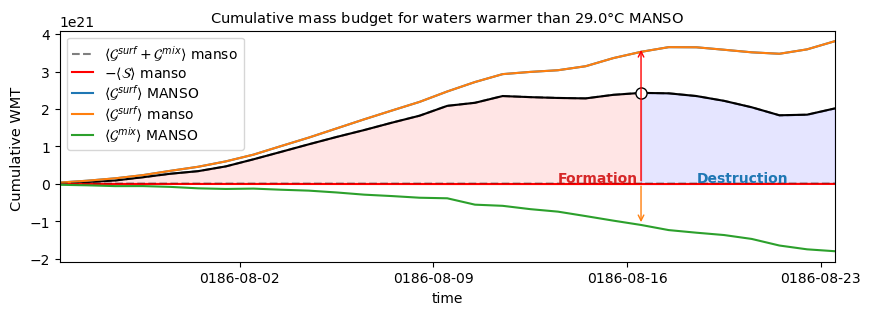

In [99]:
# Assume wmb, ds, event, wmt_plot, manso_wmt_plot, DeltaM, ΔMMHW_mhw, idx_destroy are defined

fig, ax = plt.subplots(figsize=(10, 3))

##Plotting the data
#ΔMMHW_mhw.isel(time=slice(0, idx_destroy[-1])).plot(color="k")
ΔMManso_mhw.isel(time=slice(0, idx_destroy_manso[-1])).plot(color="k")
#(-(wmt_plot['boundary_fluxes'] + wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).plot(color="k", label=r"$\langle \mathcal{G}^{surf}+\mathcal{G}^{mix} \rangle$", ls="--", alpha=0.5)
(-(manso_wmt_plot['boundary_fluxes'] + manso_wmt_plot['diffusion'] + manso_wmt_plot['spurious_numerical_mixing']) * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).plot(color="k", label=r"$\langle \mathcal{G}^{surf}+\mathcal{G}^{mix} \rangle$ manso", ls="--", alpha=0.5)

#(wmt_plot['mass_source'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).plot(color="r", label=r"$-\langle \mathcal{S} \rangle$")
(manso_wmt_plot['mass_source'] * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).plot(color="r", label=r"$-\langle \mathcal{S} \rangle$ manso")

#ΔGsurf = (-wmt_plot['boundary_fluxes'] * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
#ΔGsurf.plot(label=r"$\langle \mathcal{G}^{surf} \rangle$")
ΔGsurfManso = (-manso_wmt_plot['boundary_fluxes'] * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
ΔGsurfManso.plot(label=r"$\langle \mathcal{G}^{surf} \rangle$ MANSO")
(-manso_wmt_plot['boundary_fluxes'] * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).plot(label=r"$\langle \mathcal{G}^{surf} \rangle$ manso")

#ΔGmix = (-(wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
#ΔGmix.plot(label=r"$\langle \mathcal{G}^{mix} \rangle$")
ΔGmixManso = (-(manso_wmt_plot['diffusion'] + manso_wmt_plot['spurious_numerical_mixing']) * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29)
ΔGmixManso.plot(label=r"$\langle \mathcal{G}^{mix} \rangle$ MANSO")


##Line at 0
ax.axhline(y=ΔMManso_mhw[0], color='k', linestyle='--',alpha=0.2)
#ax.axhline(y=ΔMMHW_mhw[0], color='k', linestyle='--',alpha=0.2)
##No fill marker

ax.plot(ΔMManso_mhw.time.isel(time=idx_max_manso), ΔMManso_mhw.isel(time=idx_max_manso), 'wo', markeredgecolor='k', markersize=8)
#ax.plot(ΔMMHW_mhw.time.isel(time=idx_max), ΔMMHW_mhw.isel(time=idx_max), 'wo', markeredgecolor='k', markersize=8)

##Arrows
start_point = (ΔMManso_mhw.time.isel(time=idx_max_manso).values,ΔMManso_mhw[0] )#ΔMMHW_mhw.isel(time=22).values)
end_point = (ΔMManso_mhw.time.isel(time=idx_max_manso).values, (-manso_wmt_plot['boundary_fluxes'] * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).isel(time=22).values)
ax.annotate('', xy=end_point, xytext=start_point, arrowprops=dict(arrowstyle='->', color='red'))

start_point = (ΔMManso_mhw.time.isel(time=idx_max_manso.values).values,ΔMManso_mhw[0])#ΔMMHW_mhw.isel(time=22).values)
end_point_des = (ΔMManso_mhw.time.isel(time=idx_max_manso.values).values, ΔGmixManso.isel(time=idx_max_manso.values).values)
ax.annotate('', xy=end_point_des, xytext=start_point, arrowprops=dict(arrowstyle='->', color='C1'))

## Fill 
#Formation
fill_times_form = ΔMManso_mhw.time.isel(time=slice(0, idx_max_manso.values+1)).values
fill_deltaM_form = ΔMManso_mhw.isel(time=slice(0, idx_max_manso.values+1)).values
mass_source_limit = (manso_wmt_plot['mass_source'] * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).isel(time=slice(0, idx_max_manso.values+1)).values
ax.fill_between(fill_times_form, mass_source_limit, fill_deltaM_form, color='red', alpha=0.1)

#Destruction
fill_times_des = ΔMManso_mhw.time.isel(time=slice(idx_max_manso.values, idx_destroy_manso[-1])).values
fill_deltaM_des = ΔMManso_mhw.isel(time=slice(idx_max_manso.values, idx_destroy_manso[-1])).values
mass_source_limit = (manso_wmt_plot['mass_source'] * manso_wmt_plot.dt ).cumsum('time').interp(thetao_l_target=29).isel(time=slice(idx_max_manso.values, idx_destroy_manso[-1])).values
ax.fill_between(fill_times_des, mass_source_limit, fill_deltaM_des, color='blue', alpha=0.1)

# Formation bold words
xaxform = ΔMManso_mhw.time.isel(time=18).values
xaxdes = ΔMManso_mhw.time.isel(time=23).values
yax = ΔMManso_mhw.isel(time=1).values
ax.annotate("Formation", (xaxform, yax), color="C3", weight="bold")
ax.annotate("Destruction", (xaxdes, yax), color="C0", weight="bold")

Tmax = '%.1f' % np.round(29, 1)
plt.title(f"Cumulative mass budget for waters warmer than {Tmax}$\degree$C MANSO", fontsize=10.5)
plt.ylabel("Cumulative WMT ", fontsize=10.5)

plt.xlim(ΔMManso_mhw.time.isel(time=0).values,ΔMManso_mhw.time.isel(time=28).values)

# Create a secondary y-axis
#secax = ax.secondary_yaxis('right', functions=(M_to_percentage, percentage_to_M))
#secax.set_ylabel('WW%')
#secax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.legend(fontsize=10, labelspacing=0.08, handlelength=1.5, loc="upper left")

plt.show()